['dhm_havvandpaaland', 'dhm_flow_ekstremregn', 'dhm_bluespot_ekstremregn', 'dhm_gummistoevleindeks_havvand', 'dhm_gummistoevleindeks_havvand_10cm', 'dhm_gummistoevleindeks_havvand_20cm', 'dhm_gummistoevleindeks_havvand_30cm', 'dhm_gummistoevleindeks_havvand_40cm', 'dhm_gummistoevleindeks_havvand_50cm', 'dhm_gummistoevleindeks_havvand_60cm', 'dhm_gummistoevleindeks_havvand_70cm', 'dhm_gummistoevleindeks_havvand_80cm', 'dhm_gummistoevleindeks_havvand_90cm', 'dhm_gummistoevleindeks_havvand_100cm', 'dhm_gummistoevleindeks_havvand_110cm', 'dhm_gummistoevleindeks_havvand_120cm', 'dhm_gummistoevleindeks_havvand_130cm', 'dhm_gummistoevleindeks_havvand_140cm', 'dhm_gummistoevleindeks_havvand_150cm', 'dhm_gummistoevleindeks_havvand_160cm', 'dhm_gummistoevleindeks_havvand_170cm', 'dhm_gummistoevleindeks_havvand_180cm', 'dhm_gummistoevleindeks_havvand_190cm', 'dhm_gummistoevleindeks_havvand_200cm', 'dhm_gummistoevleindeks_havvand_210cm', 'dhm_gummistoevleindeks_havvand_220cm', 'dhm_gummistoevleind

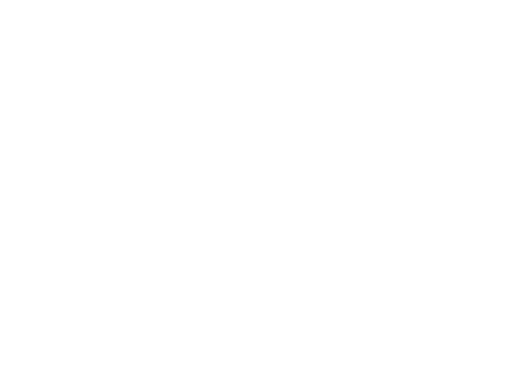

In [4]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt

# URL til WMS-tjenesten
wms_url = "https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457"

# Forbindelse til WMS-service
wms = WebMapService(wms_url, version='1.1.1')

# Vis alle tilgængelige lag
print(list(wms.contents))

# Vælg et specifikt lag (tilpas navnet afhængigt af hvad der er tilgængeligt)
layer_name = 'dhm_havvandpaaland'  # Eksempel på et lag

# Hent billedet fra WMS-service
try:
    img = wms.getmap(
        layers=[layer_name],
        srs='EPSG:4326',  # Koordinatsystem, juster efter behov
        bbox=(8, 54, 12, 58),  # Juster til et passende område for test
        size=(800, 600),
        format='image/png',
        transparent=True
    )

    # Kontroller, om data er korrekt hentet
    if img:
        print("Billeddata hentet succesfuldt")

        # Gem billedet midlertidigt
        with open('wms_image.png', 'wb') as out:
            out.write(img.read())

        # Visualiser billedet
        img_data = plt.imread('wms_image.png')
        plt.imshow(img_data)
        plt.axis('off')  # Sluk for akser
        plt.show()
    else:
        print("Ingen data modtaget fra WMS-tjenesten")
except Exception as e:
    print(f"Fejl ved hentning af WMS-billede: {e}")


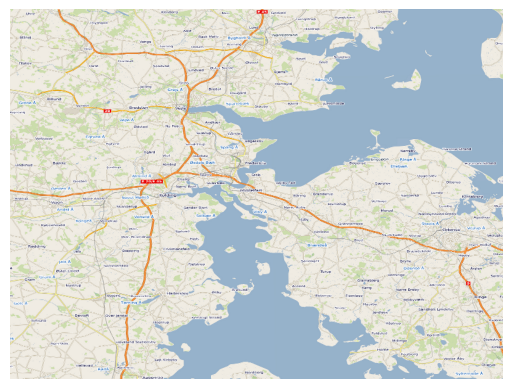

In [21]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# URL til OpenStreetMap WMS (kan bruges som baggrundskort)
osm_wms_url = 'https://ows.terrestris.de/osm/service?'

# URL til din WMS-tjeneste
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'

# Forbind til WMS-tjenesterne
osm_wms = WebMapService(osm_wms_url, version='1.1.1')
data_wms = WebMapService(wms_url, version='1.1.1')

# Vælg det lag fra din tjeneste, du vil visualisere
layer_name = 'dhm_bluespot_ekstremregn'

# Bounding box for et mindre område i Danmark (EPSG:4326 for OpenStreetMap)
bbox = (500000, 6100000, 600000, 6200000) # Justeret bounding box for Danmark i WGS84

try:
    # Hent baggrundskort fra OpenStreetMap
    osm_img = osm_wms.getmap(
        layers=['OSM-WMS'],
        srs='EPSG:25832',
        bbox=bbox,
        size=(800, 600),
        format='image/png',
        transparent=True
    )

    # Gem baggrundskortet midlertidigt
    osm_image_filename = 'osm_background.png'
    with open(osm_image_filename, 'wb') as out:
        out.write(osm_img.read())

    # Hent data fra din WMS-tjeneste (f.eks. dhm_bluespot_ekstremregn)
    data_img = data_wms.getmap(
        layers=[layer_name],
        srs='EPSG:25832',
        bbox=bbox,
        size=(800, 600),
        format='image/png',
        transparent=True
    )

    # Gem billedet midlertidigt
    data_image_filename = 'data_overlay.png'
    with open(data_image_filename, 'wb') as out:
        out.write(data_img.read())

    # Indlæs billederne
    osm_background = Image.open(osm_image_filename)
    data_overlay = Image.open(data_image_filename)

    # Kombiner baggrund og overlay
    combined = Image.alpha_composite(osm_background.convert('RGBA'), data_overlay.convert('RGBA'))

    # Vis det kombinerede billede
    plt.imshow(combined)
    plt.axis('off')  # Fjern akserne for et rent kort
    plt.show()

except Exception as e:
    print(f"Fejl ved hentning af WMS-data: {e}")


In [ ]:
token = '30494b8c7d48e71467a3bca51afaf457'

In [29]:
import folium

# Opret kort over Danmark
denmark_map = folium.Map(location=[56.2639, 9.5018], zoom_start=6)

# WMS-tjeneste URL med token
wms_url = "https://api.dataforsyningen.dk/dagi_DAF?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457"

# Tilføj WMS-laget (DAF-laget fra Dataforsyningen)
wms_layer = folium.WmsTileLayer(
    url=wms_url,
    layers="afstemningsomraader",  # Du kan ændre dette til et passende lag fra GetCapabilities
    name="Afstemningsområder",
    format="image/png",
    transparent=True,
    control=True
)

# Tilføj WMS-laget til kortet
wms_layer.add_to(denmark_map)

# Tilføj lagkontrol til toggling
folium.LayerControl().add_to(denmark_map)

# Gem kortet
denmark_map.save('denmark_map_with_dagi_wms.html')

# Vis kortet i notebooken
denmark_map


In [45]:
import requests

# URL til WMTS GetCapabilities service
url = "https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn?service=WMTS&request=GetCapabilities&token="

# Send anmodning til WMTS service
response = requests.get(url)

# Kontrollér statuskode og få et udsnit af svaret
if response.status_code == 200:
    print("Succes! WMTS-dataene blev hentet korrekt.")
    print(response.content[:1000].decode('utf-8'))  # Udskriv de første 1000 tegn for et overblik
else:
    print(f"Fejl: {response.status_code}")


Succes! WMTS-dataene blev hentet korrekt.
<?xml version="1.0" encoding="utf-8"?>
<Capabilities xmlns="http://www.opengis.net/wmts/1.0" xmlns:gml="http://www.opengis.net/gml" xmlns:ows="http://www.opengis.net/ows/1.1" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.0.0" xsi:schemaLocation="http://www.opengis.net/wmts/1.0 http://schemas.opengis.net/wmts/1.0/wmtsGetCapabilities_response.xsd">
  <ows:ServiceIdentification>
    <ows:Title>Bluespot</ows:Title>
    <ows:Abstract>Tilet version af laget dhm_bluespot_ekstremregn fra WMS:dhm</ows:Abstract>
    <ows:Keywords>
      <ows:Keyword>dhm</ows:Keyword>
      <ows:Keyword>DHM</ows:Keyword>
      <ows:Keyword>bluespot</ows:Keyword>
      <ows:Keyword>ekstremregn</ows:Keyword>
      <ows:Keyword>klima</ows:Keyword>
      <ows:Keyword>WMTS</ows:Keyword>
    </ows:Keywords>
    <ows:ServiceType>OGC:WMTS</ows:ServiceType>
    <ows:ServiceTypeVersion>1.0.0</ows:ServiceTypeVersion>
    

In [47]:
import requests
import xml.etree.ElementTree as ET

# Send anmodning til WMTS service
url = "https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn?service=WMTS&request=GetCapabilities&token="
response = requests.get(url)

# Parse XML-svaret
root = ET.fromstring(response.content)

# Find alle lagene (indkapslet i <Layer>-tags)
namespaces = {
    'ows': 'http://www.opengis.net/ows/1.1',
    'wmts': 'http://www.opengis.net/wmts/1.0'
}

# Udtræk lag-information
layers = root.findall('.//wmts:Layer', namespaces)
for layer in layers:
    title = layer.find('ows:Title', namespaces).text
    identifier = layer.find('ows:Identifier', namespaces).text
    abstract = layer.find('ows:Abstract', namespaces).text if layer.find('ows:Abstract', namespaces) is not None else "Ingen beskrivelse"
    
    print(f"Title: {title}")
    print(f"Identifier: {identifier}")
    print(f"Abstract: {abstract}")
    print('-' * 50)


Title: bluespot_ekstremregn_0
Identifier: bluespot_ekstremregn_0
Abstract: bluespot_ekstremregn_0
--------------------------------------------------
Title: bluespot_ekstremregn_0_015
Identifier: bluespot_ekstremregn_0_015
Abstract: bluespot_ekstremregn_0_015
--------------------------------------------------
Title: bluespot_ekstremregn_0_030
Identifier: bluespot_ekstremregn_0_030
Abstract: bluespot_ekstremregn_0_030
--------------------------------------------------
Title: bluespot_ekstremregn_0_045
Identifier: bluespot_ekstremregn_0_045
Abstract: bluespot_ekstremregn_0_045
--------------------------------------------------
Title: bluespot_ekstremregn_0_060
Identifier: bluespot_ekstremregn_0_060
Abstract: bluespot_ekstremregn_0_060
--------------------------------------------------
Title: bluespot_ekstremregn_0_075
Identifier: bluespot_ekstremregn_0_075
Abstract: bluespot_ekstremregn_0_075
--------------------------------------------------
Title: bluespot_ekstremregn_0_090
Identifier: 

In [57]:
import folium
from folium.raster_layers import WmsTileLayer

# Opret et Leaflet-kort centreret over Danmark
m = folium.Map(
    location=[56, 10],  # Centreret over Danmark
    zoom_start=7,
    crs='EPSG3857'  # Brug EPSG:25832 som angivet i GetCapabilities-dokumentet
)

# Liste over lag, vi vil tilføje til kortet
layers = [
    'bluespot_ekstremregn_0',
    'bluespot_ekstremregn_0_015',
    'bluespot_ekstremregn_0_030',
    'bluespot_ekstremregn_0_150plus'
]

# Tilføj hvert WMTS-lag til kortet med EPSG:25832
for layer in layers:
    folium.raster_layers.WmsTileLayer(
        url="https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn",
        name=layer,
        fmt="image/png",
        layers=layer,  # Brug layer identifier fra listen
        attr="Dataforsyningen",
        transparent=True,
        version="1.0.0",
        crs='EPSG25832',  # Angiv EPSG:25832 projektion
        tilematrixset="View1"  # Brug TileMatrixSet fra XML
    ).add_to(m)

# Tilføj lagkontrol for at kunne skifte mellem lagene
folium.LayerControl().add_to(m)

# Vis kortet
m


In [62]:
import folium

# Opret et Leaflet-kort centreret over Danmark
m = folium.Map(
    location=[56, 10],  # Centreret over Danmark
    zoom_start=7,
    crs='EPSG3857'  # Leaflet understøtter desværre ikke EPSG:25832 direkte, så vi bruger Web Mercator (EPSG:3857)
)

# WMTS URL-template med korrekt variabelindsættelse
url_template = (
    "https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn?"
    "service=WMTS&request=GetTile&version=1.0.0&layer={layer}&style=default&"
    "tilematrixset=View1&TileMatrix={z}&TileRow={y}&TileCol={x}&format=image/png&token={token}"
)

# Tilføj et eksempel-lag 'bluespot_ekstremregn_0' for at teste
folium.raster_layers.TileLayer(
    tiles=url_template.format(layer='bluespot_ekstremregn_0'),
    attr="Dataforsyningen",
    name='bluespot_ekstremregn_0_150',
    fmt='image/png',
    tms=True  # TileMatrixSet bruger TMS-indeksering, så vi aktiverer dette
).add_to(m)

# Tilføj lagkontrol for at kunne skifte mellem lagene
folium.LayerControl().add_to(m)

# Vis kortet
m


KeyError: 'z'

In [41]:
from ipyleaflet import Map, WMSLayer, LayersControl

# Opret kort over Danmark
m = Map(center=(56.2639, 9.5018), zoom=6)

# Tilføj WMS-laget fra Dataforsyningen (DHM Bluespot Ekstremregn)
wms_layer = WMSLayer(
    url="https://api.dataforsyningen.dk/dhm",
    layers="dhm:bluespot",  # Dette er et eksempel på lag for Bluespot ekstremregn
    format="image/png",
    transparent=True,
    attribution="Dataforsyningen",
)

# Tilføj laget til kortet
m.add_layer(wms_layer)

# Tilføj lagkontrol for toggling
m.add_control(LayersControl())

# Vis kortet
m


Map(center=[56.2639, 9.5018], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [37]:
from ipyleaflet import Map, WMSLayer, basemaps

wms = WMSLayer(
    url='https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457',
    layers='dhm_bluespot_ekstremregn',
    format='image/png',
    transparent=True,
    attribution='Weather data © 2012 IEM Nexrad'
)

m = Map(basemap=basemaps.CartoDB.Positron, center=(38.491, -95.712), zoom=4)

m.add(wms)

m

Map(center=[38.491, -95.712], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [64]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import requests


In [65]:
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'
wms = WebMapService(wms_url, version='1.1.1')


In [66]:
# List tilgængelige lag på serveren
for layer in wms.contents:
    print(layer)


dhm_havvandpaaland
dhm_flow_ekstremregn
dhm_bluespot_ekstremregn
dhm_gummistoevleindeks_havvand
dhm_gummistoevleindeks_havvand_10cm
dhm_gummistoevleindeks_havvand_20cm
dhm_gummistoevleindeks_havvand_30cm
dhm_gummistoevleindeks_havvand_40cm
dhm_gummistoevleindeks_havvand_50cm
dhm_gummistoevleindeks_havvand_60cm
dhm_gummistoevleindeks_havvand_70cm
dhm_gummistoevleindeks_havvand_80cm
dhm_gummistoevleindeks_havvand_90cm
dhm_gummistoevleindeks_havvand_100cm
dhm_gummistoevleindeks_havvand_110cm
dhm_gummistoevleindeks_havvand_120cm
dhm_gummistoevleindeks_havvand_130cm
dhm_gummistoevleindeks_havvand_140cm
dhm_gummistoevleindeks_havvand_150cm
dhm_gummistoevleindeks_havvand_160cm
dhm_gummistoevleindeks_havvand_170cm
dhm_gummistoevleindeks_havvand_180cm
dhm_gummistoevleindeks_havvand_190cm
dhm_gummistoevleindeks_havvand_200cm
dhm_gummistoevleindeks_havvand_210cm
dhm_gummistoevleindeks_havvand_220cm
dhm_gummistoevleindeks_havvand_230cm
dhm_gummistoevleindeks_havvand_240cm
dhm_gummistoevleindeks_ha

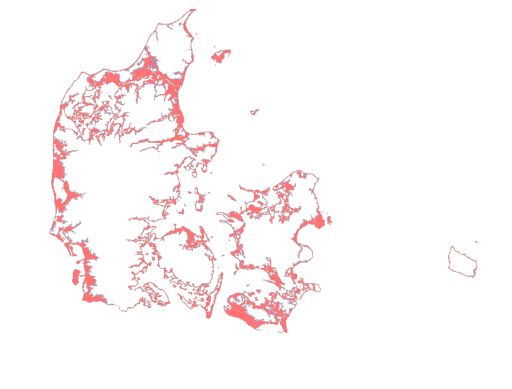

In [94]:

bbox = (400000, 6000000, 920000, 6400000)

# Vælg et specifikt lag og hent det som billede
layer_name = 'dhm_gummistoevleindeks_havvand_600cm'
img = wms.getmap(layers=[layer_name],
                 srs='EPSG:25832',   # Koordinatsystem (f.eks. WGS84)
                 bbox=bbox,  # Geografisk udstrækning (xmin, ymin, xmax, ymax)
                 size=(800, 600),   # Billedstørrelse
                 format='image/png',  # Billedformat
                 transparent=True)   # Transparent baggrund

# Konverter billedet til et format, som kan vises i Python
img_bytes = BytesIO(img.read())
image = Image.open(img_bytes)

# Vis billedet med matplotlib
plt.imshow(image)
plt.axis('off')  # Fjern akser
plt.show()


In [95]:
import folium

# Definer bounding box for Danmark i EPSG:25832 (omregnet til grader for visning i folium)
# Danmark omtrentlige koordinater i WGS84:
bbox = [[54.5, 8], [58, 15]]  # (latitude, longitude)

# Opret et folium-kort centreret på Danmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=7, crs='EPSG3857')  # EPSG3857 bruges af standard webkort

layer_name = 'dhm_gummistoevleindeks_havvand_600cm'

# Tilføj WMS-lag uden at sende 'attribution' flere gange
folium.raster_layers.WmsTileLayer(
    url=wms_url,  # WMS serverens URL
    name='DHM Gummistøvleindeks Havvand 600cm',  # Lagets navn
    layers=layer_name,  # WMS-laget du ønsker at tilføje
    fmt='image/png',  # Billedformat
    transparent=True,  # Transparent baggrund
    version='1.1.1',  # WMS version
    overlay=True,  # Tillad at det vises oven på andre lag
    control=True,  # Vis kontrolelement for at slå lag til og fra
).add_to(m)

# Tilføj kontrolpanel til at slå lag til og fra
folium.LayerControl().add_to(m)

# Gem kortet som en HTML-fil og vis det
m.save('wms_interaktiv_danmark.html')

# Hvis du kører det i en Jupyter Notebook, kan du vise kortet direkte med:
m


In [115]:
from owslib.wms import WebMapService

# Forbindelse til WMS-serveren
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'
wms = WebMapService(wms_url, version='1.1.1')

# Opret en tom liste til at opbevare lag og styles
layers_and_styles = []

# List alle lag på serveren
for layer_name in wms.contents:
    # Hent information om laget
    layer = wms[layer_name]
    
    # Hvis laget har styles, tilføj dem til listen
    if hasattr(layer, 'styles'):
        print(f"Layer: {layer_name}, Title: {layer.title}")
        for style_name, style_info in layer.styles.items():
            print(f"- Style name: {style_name}, Title: {style_info['title']}")
            # Tilføj lagets navn, style og beskrivelse til dictionary'en
            layers_and_styles.append({
                'layer_name': layer_name,
                'style': style_name,
                'name': f"{layer.title} ({style_info['title']})"  # Kombiner lagets titel med style-titlen
            })
    else:
        print(f"Layer: {layer_name} has no styles.")

# Print den oprettede liste
for item in layers_and_styles:
    print(item)


Layer: dhm_havvandpaaland, Title: DHM/Havvand på Land
- Style name: default, Title: default
- Style name: havvandpaaland_0, Title: DHM/Havvand på Land 0 m
- Style name: havvandpaaland_0_1, Title: DHM/Havvand på Land 0,1 m
- Style name: havvandpaaland_0_2, Title: DHM/Havvand på Land 0,2 m
- Style name: havvandpaaland_0_3, Title: DHM/Havvand på Land 0,3 m
- Style name: havvandpaaland_0_4, Title: DHM/Havvand på Land 0,4 m
- Style name: havvandpaaland_0_5, Title: DHM/Havvand på Land 0,5 m
- Style name: havvandpaaland_0_6, Title: DHM/Havvand på Land 0,6 m
- Style name: havvandpaaland_0_7, Title: DHM/Havvand på Land 0,7 m
- Style name: havvandpaaland_0_8, Title: DHM/Havvand på Land 0,8 m
- Style name: havvandpaaland_0_9, Title: DHM/Havvand på Land 0,9 m
- Style name: havvandpaaland_1, Title: DHM/Havvand på Land 1 m
- Style name: havvandpaaland_1_1, Title: DHM/Havvand på Land 1,1 m
- Style name: havvandpaaland_1_2, Title: DHM/Havvand på Land 1,2 m
- Style name: havvandpaaland_1_3, Title: DHM/

In [121]:
import folium
from geopy.geocoders import Nominatim

# Opret en geokodningsfunktion ved hjælp af Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Angiv adressen
adresse = "Utterslevvej 3, 2400 København"

# Geokod adressen (find koordinaterne)
location = geolocator.geocode(adresse)

# Tjek om geokodningen lykkedes
if location:
    # Print latitude og longitude
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
    
    # Opret et Folium-kort centreret på de fundne koordinater
    m = folium.Map(location=[location.latitude, location.longitude], zoom_start=15, crs='EPSG3857')  # EPSG3857 bruges af standard webkort
    
    # Tilføj en markør ved den fundne adresse
    folium.Marker([location.latitude, location.longitude], popup=adresse).add_to(m)
    
    # Gem kortet som en HTML-fil og vis det
    m.save('adresse_geokodning_kort.html')
    
    # Hvis du kører det i en Jupyter Notebook, kan du vise kortet direkte med:
    m
else:
    print("Kunne ikke finde koordinater for den angivne adresse.")


Latitude: 55.706783, Longitude: 12.514186


In [150]:
import requests
import pyproj

# Funktion til at udføre en GetFeatureInfo-forespørgsel
def get_feature_info(lat, lon, wms_url, layer_name, srs='EPSG:3857'):
    # Transformer koordinater fra EPSG:4326 (WGS84) til EPSG:3857
    #transformer = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)
    #lon_3857, lat_3857 = transformer.transform(lon, lat)
    
    params = {
        'service': 'WMS',
        'request': 'GetFeatureInfo',
        'version': '1.1.1',
        'layers': layer_name,
        'srs': srs,
        'bbox': f"{lon-100},{lat-100},{lon+100},{lat+100}",
        'width': '200',  # Større bredde og højde for at sikre et bredere område
        'height': '200',
        'query_layers': layer_name,
        'info_format': 'text/plain',  # Bruger text/plain format til forespørgslen
        'x': '100',  # Midten af forespørgslen (200x200 billede)
        'y': '100',
        'format': 'image/png'  # Billedformat
    }
    
    response = requests.get(wms_url, params=params)
    
    # Udskriv rådata fra serveren for at fejlsøge
    print("Server response content:", response.content)
    
    # Tjek om svaret er gyldig tekst
    if response.status_code == 200:
        try:
            return response.text  # Forsøg at returnere som tekst
        except ValueError:
            # Hvis det ikke er gyldig tekst, returner rå indhold
            return response.content
    else:
        print(f"Error: {response.status_code}")
        return None

# Eksempelopkald til funktionen med lokation og WMS lag
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'
feature_info = get_feature_info(56.26392, 9.501785, wms_url, 'dhm_gummistoevleindeks_havvand_580cm')

# Udskriv resultatet af forespørgslen
print("Feature Info:", feature_info)


Server response content: b'GetFeatureInfo results:\n\n  Search returned no results.\n'
Feature Info: GetFeatureInfo results:

  Search returned no results.



In [129]:
import folium

# Definer bounding box for Danmark i EPSG:25832 (omregnet til grader for visning i folium)
bbox = [[54.5, 8], [58, 15]]  # (latitude, longitude)

# Opret et folium-kort centreret på Danmark
m = folium.Map(location=[location.latitude, location.longitude], zoom_start=17, crs='EPSG3857')  # EPSG3857 bruges af standard webkort

# WMS-serverens URL
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'

# Tilføj et tomt baselayer, så ingen WMS-lag er valgt fra starten
folium.TileLayer('CartoDB positron', name="CartoDB Positron").add_to(m)

# Tilføj en markør ved den fundne adresse
folium.Marker([location.latitude, location.longitude], popup=adresse).add_to(m)

# Loop gennem listen og tilføj hvert lag til kortet som en base layer (kun ét ad gangen)
for item in layers_and_styles:
    folium.raster_layers.WmsTileLayer(
        url=wms_url,
        name=item['name'],  # Navn der vises i lagvælgeren
        layers=item['layer_name'],  # Navn på WMS-laget
        styles=item['style'],  # Style for WMS-laget
        fmt='image/png',  # Billedformat
        transparent=True,  # Transparent baggrund
        version='1.1.1',  # WMS version
        overlay=True,  # Sæt overlay til False, så det er et baselayer
        control=True,  # Vis kontrolelement for at vælge lag
        show=False,
    ).add_to(m)  # Vi tilføjer lagene til kortet, men de er ikke aktive ved start

# Tilføj kontrolpanel til at vælge mellem lagene (baselayers)
folium.LayerControl(position='topright', collapsed=False).add_to(m)

# Gem kortet som en HTML-fil og vis det
m.save('wms_interaktiv_danmark.html')

# Hvis du kører det i en Jupyter Notebook, kan du vise kortet direkte med:
m


In [140]:
import folium
from ipywidgets import interact, Dropdown, SelectionSlider, Layout

# Opret et folium-kort centreret på Danmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=7, crs='EPSG3857')

# WMS-serverens URL
wms_url = 'https://api.dataforsyningen.dk/dhm?service=WMS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'

# Liste over bluespot-lagene med forskellige niveauer
bluespot_levels = [
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0', 'name': 'Bluespot Ekstremregn (0 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_015', 'name': ' (0.015 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_030', 'name': ' (0.030 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_045', 'name': ' (0.045 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_060', 'name': ' (0.060 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_075', 'name': ' (0.075 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_090', 'name': ' (0.090 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_105', 'name': ' (0.105 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_120', 'name': ' (0.120 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_135', 'name': ' (0.135 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_150', 'name': ' (0.150 m)'},
    {'layer_name': 'dhm_bluespot_ekstremregn', 'style': 'bluespot_ekstremregn_0_150plus', 'name': ' (over 0.150 m)'},
]

# Funktion til at opdatere kortet baseret på valgt lag
def update_map(selected_level):
    m = folium.Map(location=[56.26392, 9.501785], zoom_start=7, crs='EPSG3857')

    # Find det valgte lag baseret på det valgte navn (niveau)
    selected_layer = next(item for item in bluespot_levels if item['name'] == selected_level)
    
    # Tilføj det valgte WMS-lag
    folium.raster_layers.WmsTileLayer(
        url=wms_url,
        name=selected_layer['name'],
        layers=selected_layer['layer_name'],
        styles=selected_layer['style'],
        fmt='image/png',
        transparent=True,
        version='1.1.1',
        overlay=True,
        control=True
    ).add_to(m)
    
    # Tilføj lagvælger
    folium.LayerControl().add_to(m)
    
    # Gem kortet som HTML-fil
    m.save('bluespot_slider_kort.html')
    
    # Vis kortet
    display(m)

# Opret en slider med ekstra plads rundt om teksten
level_slider = SelectionSlider(
    options=[level['name'] for level in bluespot_levels],
    description='Ekstremregn:',
    continuous_update=False,
    layout=Layout(margin='0px 0px 0px 0px', padding='1px')  # Ekstra plads omkring slideren
)

# Brug slideren til at opdatere kortet dynamisk
interact(update_map, selected_level=level_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='Ekstremregn:', layout=Layout(margi…

<function __main__.update_map(selected_level)>

In [86]:
from owslib.wmts import WebMapTileService

wmts_url = 'https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn?service=WMTS&request=GetCapabilities&token=30494b8c7d48e71467a3bca51afaf457'
wmts = WebMapTileService(wmts_url)


In [87]:
# List tilgængelige lag på serveren
for layer in wmts.contents:
    print(layer)


bluespot_ekstremregn_0
bluespot_ekstremregn_0_015
bluespot_ekstremregn_0_030
bluespot_ekstremregn_0_045
bluespot_ekstremregn_0_060
bluespot_ekstremregn_0_075
bluespot_ekstremregn_0_090
bluespot_ekstremregn_0_105
bluespot_ekstremregn_0_120
bluespot_ekstremregn_0_135
bluespot_ekstremregn_0_150
bluespot_ekstremregn_0_150plus


In [90]:
import folium

# Opret et folium-kort centreret på Danmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=7, crs='EPSG3857')  # EPSG3857 bruges af standard webkort

# URL-struktur til WMTS-fliser (juster afhængigt af WMTS GetCapabilities data)
layer_name = 'bluespot_ekstremregn_0_150'
tile_matrix_set = 'View1'  # Hent fra GetCapabilities dokument
tile_format = 'image/png'  # Fliseformat

# Tilføj WMTS-lag til Folium-kortet
folium.raster_layers.TileLayer(
    tiles=f'https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn/{tile_matrix_set}/{{z}}/{{x}}/{{y}}.png?token=30494b8c7d48e71467a3bca51afaf457',
    name=layer_name,
    attr='DHM Bluespot Ekstremregn',
    overlay=True,
    control=True
).add_to(m)

# Tilføj kontrolpanel til at slå lag til og fra
folium.LayerControl().add_to(m)

# Gem kortet som en HTML-fil og vis det
m.save('wmts_interaktiv_danmark.html')

# Hvis du kører det i en Jupyter Notebook, kan du vise kortet direkte med:
m


In [93]:
import folium

# Opret et folium-kort centreret på Danmark
m = folium.Map(location=[56.26392, 9.501785], zoom_start=7, crs='EPSG3857')  # EPSG3857 bruges af standard webkort

# WMTS flise-URL og tilknyttede parametre
wmts_url = 'https://api.dataforsyningen.dk/dhm_bluespot_ekstremregn'
layer_name = 'bluespot_ekstremregn_0_090'  # Brug det relevante lag
tile_matrix_set = 'View1'
token = '30494b8c7d48e71467a3bca51afaf457'  # Din token

# Tilføj WMTS-laget til folium-kortet
folium.raster_layers.TileLayer(
    tiles=f"{wmts_url}/{tile_matrix_set}/{{z}}/{{x}}/{{y}}.png?token={token}",
    name='DHM Bluespot Ekstremregn',
    attr='DHM Gummistøvleindeks',
    overlay=True,  # Tillad at det vises oven på andre lag
    control=True,  # Vis kontrolelement for at slå lag til og fra
    fmt='image/png'  # Fliseformatet
).add_to(m)

# Tilføj kontrolpanel til at slå lag til og fra
folium.LayerControl().add_to(m)

# Gem kortet som en HTML-fil og vis det
m.save('wmts_interaktiv_danmark.html')

# Hvis du kører det i en Jupyter Notebook, kan du vise kortet direkte med:
m
